___

# K Means Clustering 

This notebook is a reference for running it

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.

In k means clustering: we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
- Reassign data points to the cluster whose centroid is closest. 
- Calculate new centroid of each cluster. 
These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


In [1]:
from IPython.display import IFrame

# Youtube
IFrame('https://www.youtube.com/embed/4b5d3muPQmA', 560, 315)

___

## Import Libraries

In [2]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible

%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Generate Data

In [4]:
from sklearn.datasets import make_blobs

In [5]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualize Data

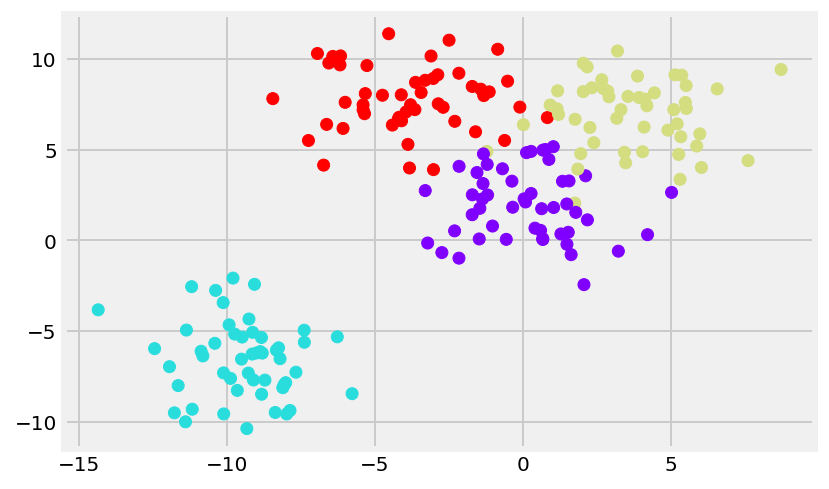

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)

In [9]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [11]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3,
       0, 1])

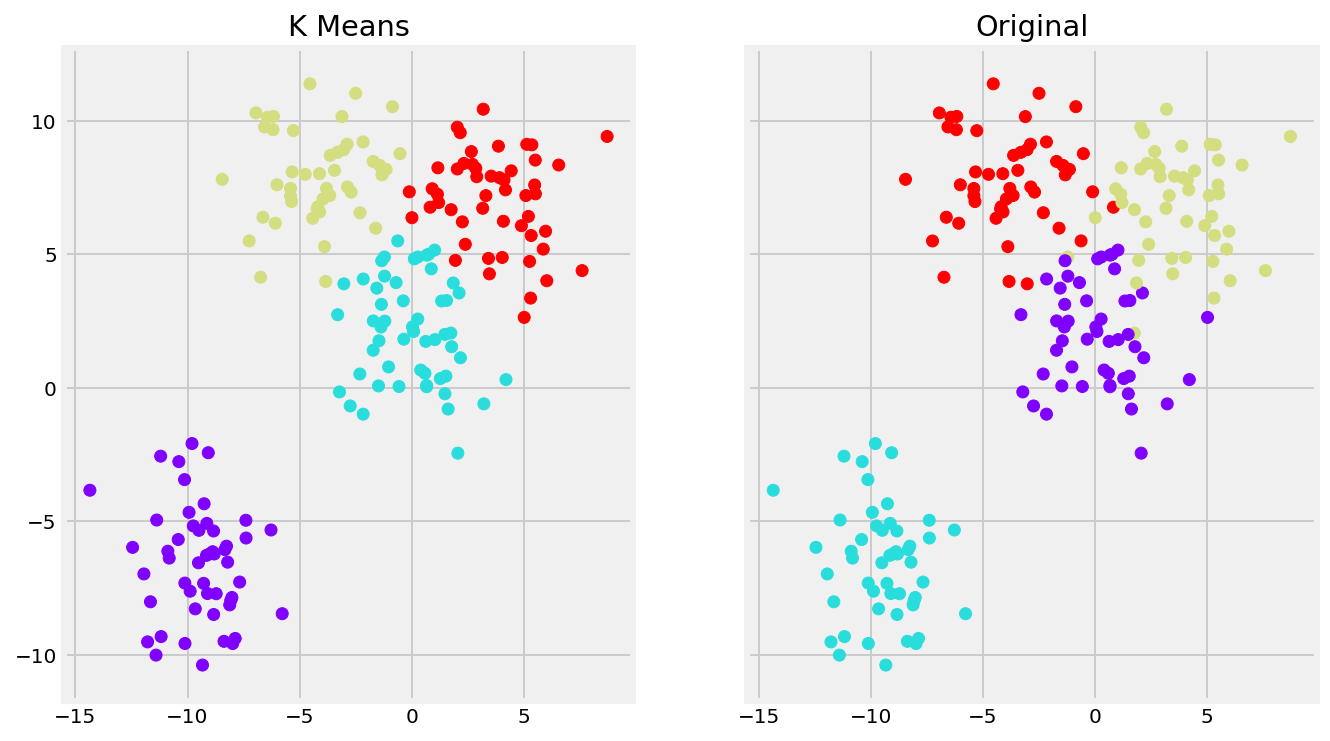

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

note that the colors are meaningless in reference between the two plots.

## Finding the value for K

The technique to determine K, the number of clusters, is called the elbow method.

**Intuition**: try increasing values for K. An overly low K wont be a good fit, a higher K will fit data better (the centroids are closer to the clusters centroids) but will start to overfit once K gets big enough. So for each increasing K value we use a cost function to measure the improvement, once the improvements starts to slow down (the elbow in the chart), we pick that as the value of K.

We plot:
- x axis = values for K on the horizontal axis
- y axis = the distortion, i.e. the values calculated with the cost function

This results in:
- When K increases,
- The improvements will decline, at some point rapidly, creating the elbow shape.

That point when the difference in cost function slows down (less gains) is the optimal value for K. 

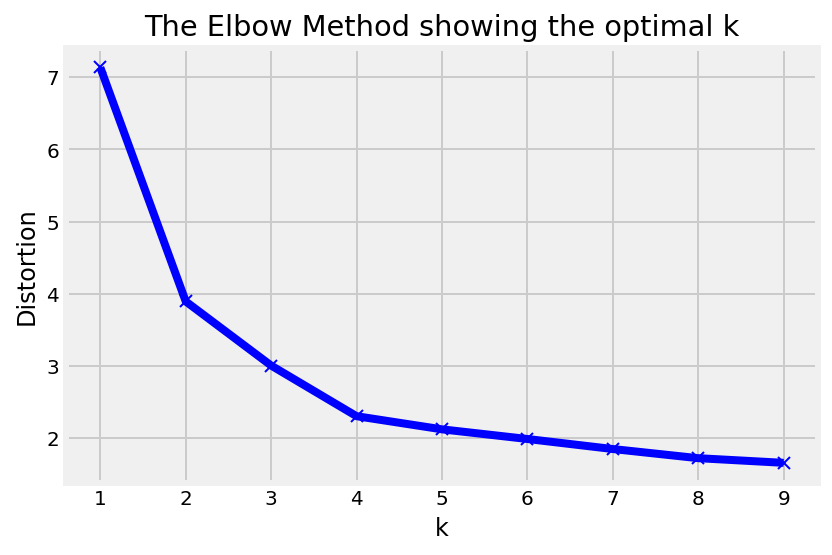

In [13]:
from scipy.spatial.distance import cdist
# k means determine k
X = data[0]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In the chart above, K=4.
(It aligns with the generated synthetic data)

### Further

Cross Validation and grid search can also be usefull: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a